In [ ]:
# This notebook is about basic neural networks using PyTorch.
# It takes inputs from 1 to 100 and classifies whether the input is greater than 50.

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

In [ ]:
#dataset
# normalize to [-1,1]
def make_data():
  x = torch.arange(1,101, dtype = torch.float32).unsqueeze(1)
  y = (x>50).float()
  x = (x - 50.5) / 49.5
  return x,y


In [ ]:
# model 1 to 8 to 4 to 1
def make_model():
  return torch.nn.Sequential(
      torch.nn.Linear(1,8),
      torch.nn.ReLU(),
      torch.nn.Linear(8,4),
      torch.nn.ReLU(),
      torch.nn.Linear(4,1)
  )

In [ ]:
# training
# cal loss then with that cal gradient
# zero_grad is used so that old gradients are deleted
# Then backward is used for backpropagation, for weights and bias
# step is used to update the weights
# Binary Cross-Entropy + Sigmoid (combined)

def train(model, x, y, epochs=1000, lr=0.1):
  loss_fn = torch.nn.BCEWithLogitsLoss()
  opt = torch.optim.SGD(model.parameters(), lr=lr)

  losses = []
  for epoch in range(1, epochs+1):
    loss = loss_fn(model(x), y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.item())

    print(f"epoch={epoch:3d}  loss={loss.item():.6f}")
  return losses

In [ ]:
# prediciton
def predict(model, x):
  return (torch.sigmoid(model(x)) >= 0.5).float()

In [ ]:
# run
x,y = make_data()
model = make_model()

losses = train(model, x, y)

preds = predict(model, x)
acc = (preds == y).float().mean().item()
print("Accuracy: ", acc)

epoch=  1  loss=0.683522
epoch=  2  loss=0.682470
epoch=  3  loss=0.681382
epoch=  4  loss=0.680258
epoch=  5  loss=0.679098
epoch=  6  loss=0.677907
epoch=  7  loss=0.676672
epoch=  8  loss=0.675389
epoch=  9  loss=0.674051
epoch= 10  loss=0.672656
epoch= 11  loss=0.671199
epoch= 12  loss=0.669683
epoch= 13  loss=0.668105
epoch= 14  loss=0.666459
epoch= 15  loss=0.664736
epoch= 16  loss=0.662929
epoch= 17  loss=0.661040
epoch= 18  loss=0.659096
epoch= 19  loss=0.657096
epoch= 20  loss=0.655035
epoch= 21  loss=0.652910
epoch= 22  loss=0.650717
epoch= 23  loss=0.648463
epoch= 24  loss=0.646164
epoch= 25  loss=0.643806
epoch= 26  loss=0.641374
epoch= 27  loss=0.638863
epoch= 28  loss=0.636276
epoch= 29  loss=0.633606
epoch= 30  loss=0.630842
epoch= 31  loss=0.627981
epoch= 32  loss=0.625031
epoch= 33  loss=0.621976
epoch= 34  loss=0.618817
epoch= 35  loss=0.615549
epoch= 36  loss=0.612194
epoch= 37  loss=0.608727
epoch= 38  loss=0.605145
epoch= 39  loss=0.601462
epoch= 40  loss=0.597692


In [ ]:
# sanity check near boundary
with torch.no_grad():
    for v in [49, 50, 51]:
        xv = torch.tensor([[ (v - 50.5) / 49.5 ]])
        p = torch.sigmoid(model(xv)).item()
        print(f"x={v}  prob={p:.4f}")


x=49  prob=0.2485
x=50  prob=0.4094
x=51  prob=0.5922


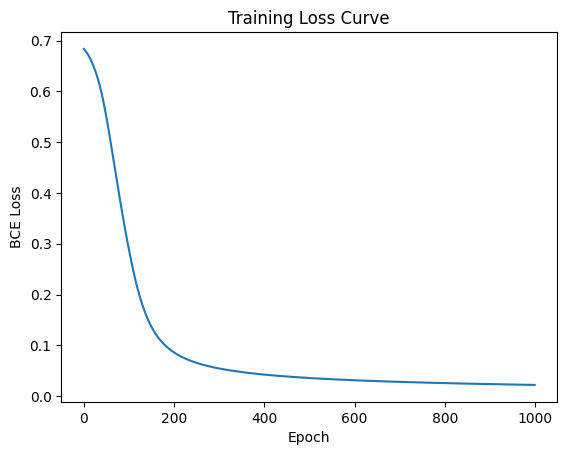

In [ ]:

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss Curve")
plt.show()